In [8]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import StratifiedKFold

In [9]:
wwine = pd.read_csv('data/winequality-white.csv', delimiter = ";") 
rwine = pd.read_csv('data/winequality-red.csv', delimiter = ";")
frames1 = [wwine, rwine]
allwine = pd.concat(frames1)
allwine.reset_index(drop=True, inplace=True)
allwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
#wwine2 = wwine[]
#rwine2 = rwine[]
#wwine2["type"] = "White Wine"
#rwine2["type"] = "Red Wine"

In [11]:
#frames2 = [wwine2, rwine2]

#allwine2 = pd.concat(frames2)
#allwine2.reset_index(drop=True, inplace=True)

In [12]:
wwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [13]:
rwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
pd.set_option('display.max_rows', 15)
allwine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

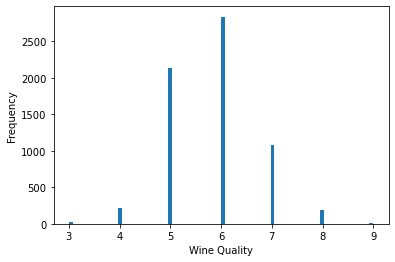

In [15]:
allwine['quality'].plot.hist(bins = int(np.sqrt(allwine.shape[0]))) 
plt.xlabel('Wine Quality')
plt.show()

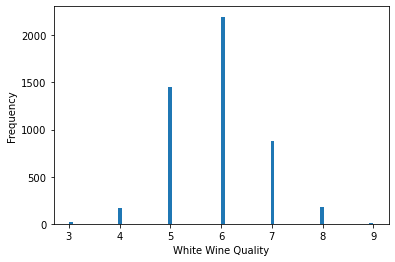

In [16]:
wwine['quality'].plot.hist(bins = int(np.sqrt(allwine.shape[0]))) 
plt.xlabel('White Wine Quality')
plt.show()

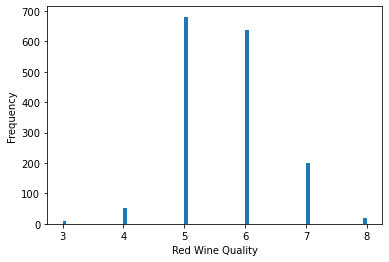

In [17]:
rwine['quality'].plot.hist(bins = int(np.sqrt(allwine.shape[0]))) 
plt.xlabel('Red Wine Quality')
plt.show()

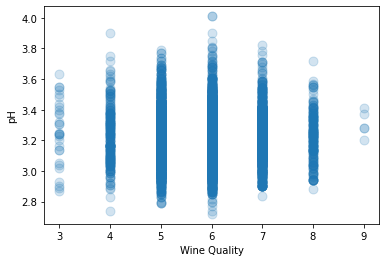

In [18]:
allwine.plot.scatter('quality','pH',alpha=0.2,s=80)
plt.ylabel('pH')
plt.xlabel('Wine Quality')
plt.show()

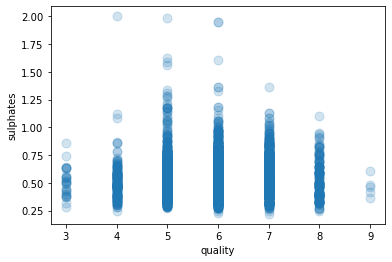

In [19]:
allwine.plot.scatter('quality','sulphates',alpha=0.2,s=80) # alpha=0.1,s=10
plt.show()

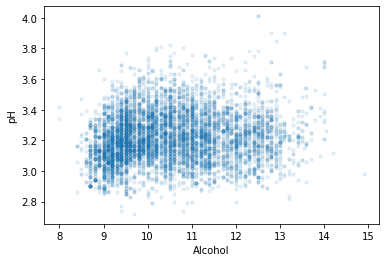

In [20]:
allwine.plot.scatter('alcohol','pH',alpha=0.1,s=10)
plt.ylabel('pH')
plt.xlabel('Alcohol')
plt.show()

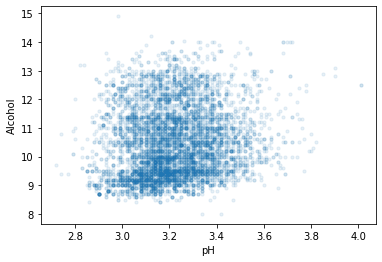

In [47]:
allwine.plot.scatter('pH','alcohol',alpha=0.1,s=10)
plt.ylabel('Alcohol')
plt.xlabel('pH')
plt.show()

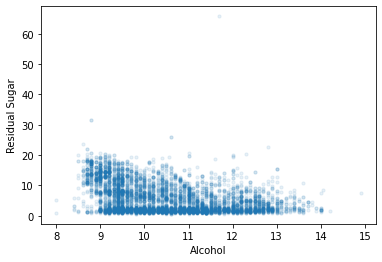

In [49]:
allwine.plot.scatter('alcohol','residual sugar',alpha=0.1,s=10)
plt.ylabel('Residual Sugar')
plt.xlabel('Alcohol')
plt.show()

In [21]:
print(allwine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

In [22]:
print(wwine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

In [23]:
print(rwine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

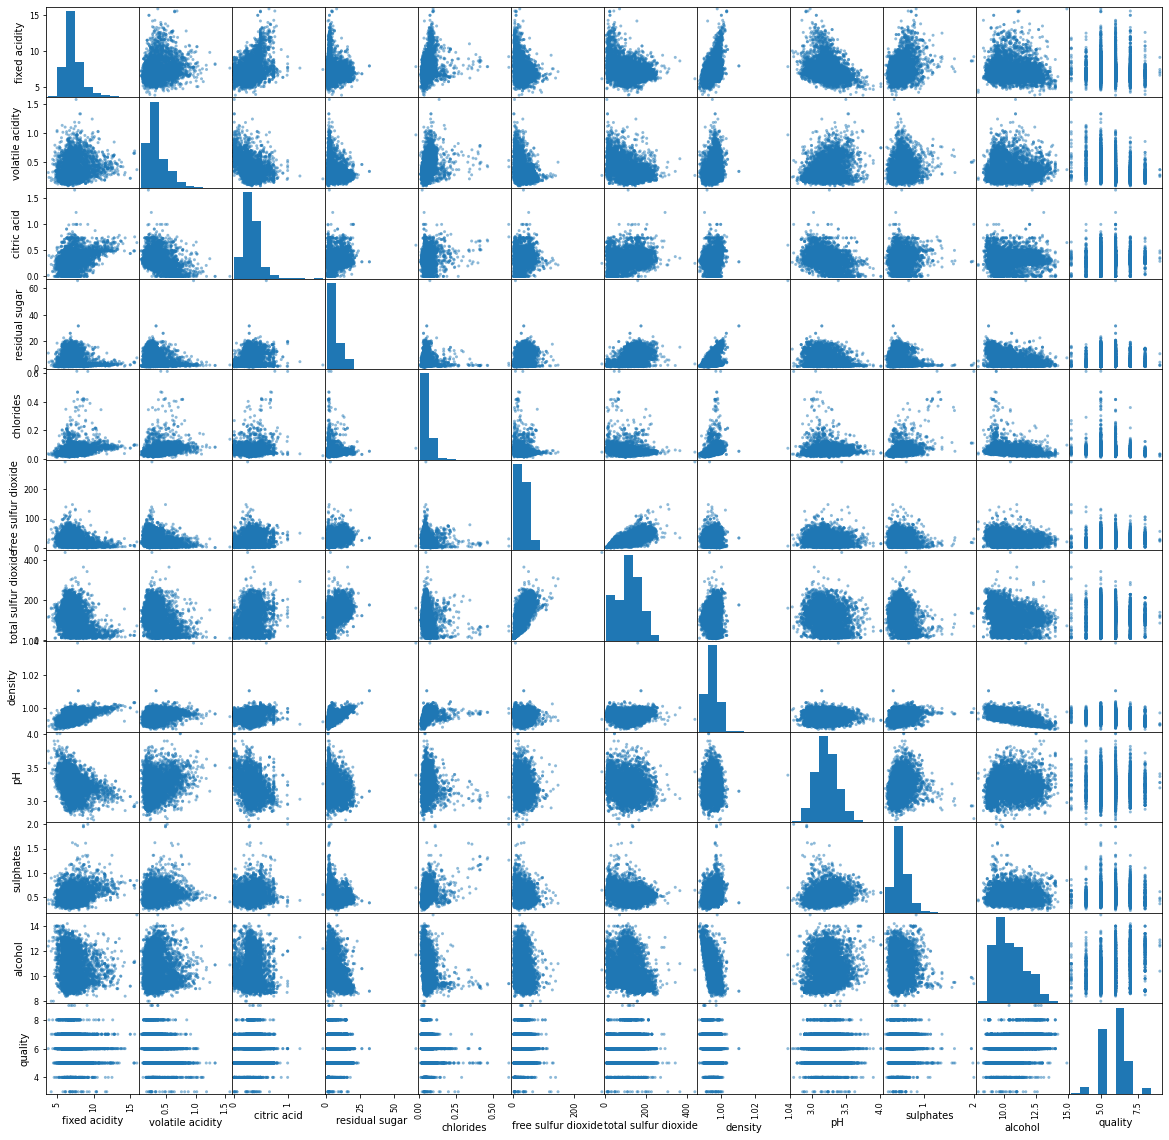

In [24]:
pd.plotting.scatter_matrix(allwine, figsize=(20, 20))
plt.show()

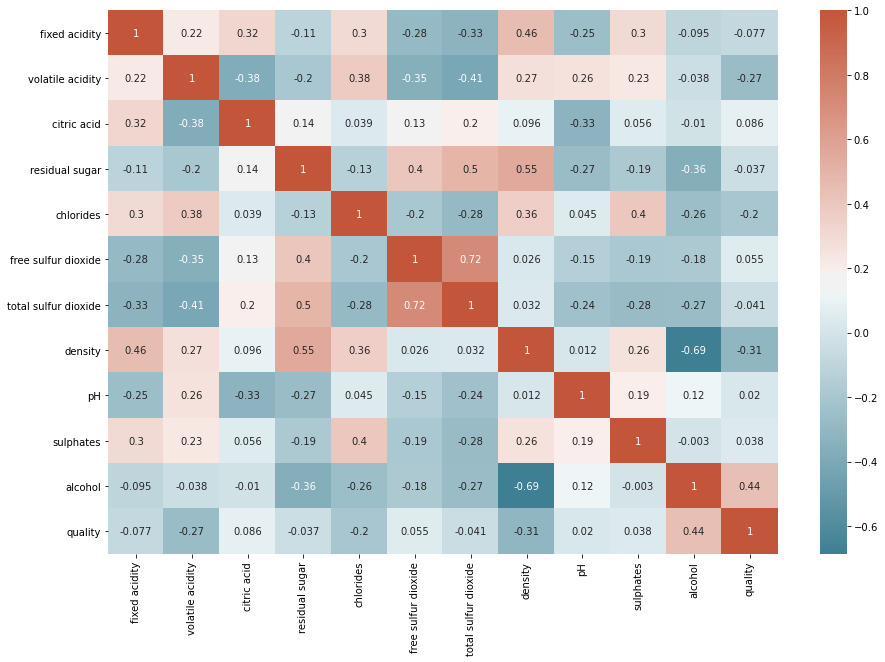

In [25]:
corr = allwine.corr()
matplotlib.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

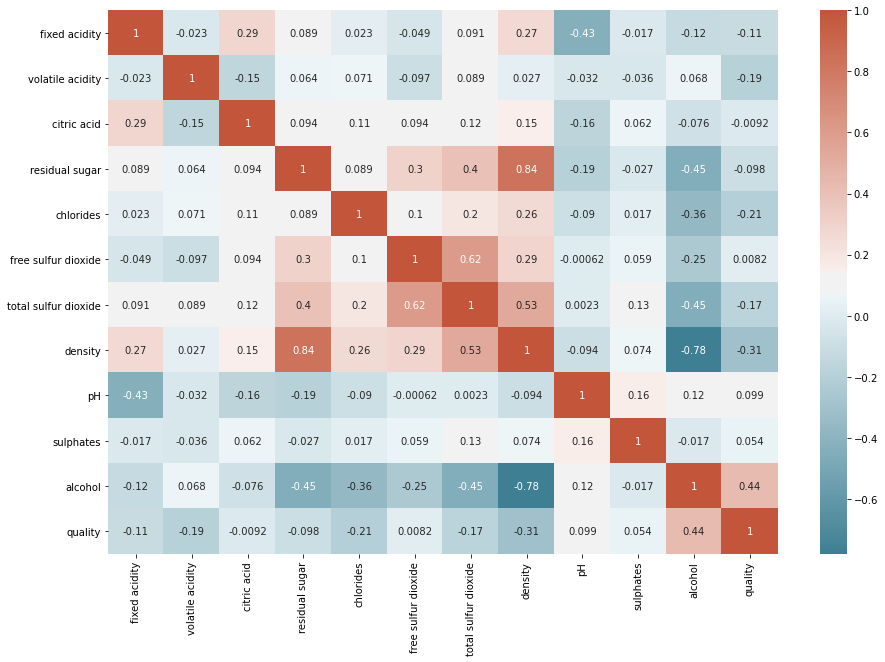

In [26]:
corr = wwine.corr()
matplotlib.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

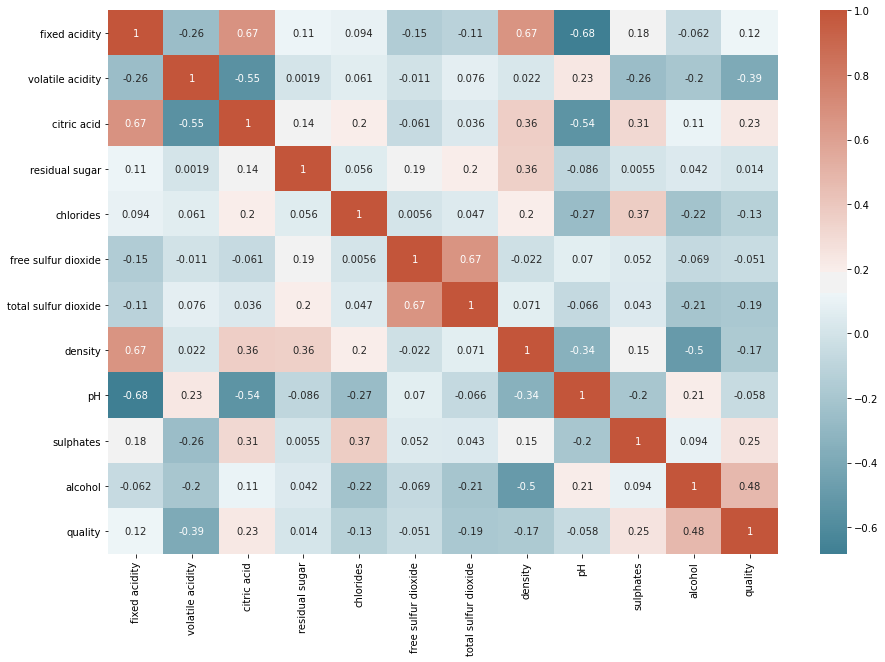

In [27]:
corr = rwine.corr()
matplotlib.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [28]:
#allwine[['type','quality']].boxplot(by='type')
#plt.ylabel('quality')
#plt.show()

In [29]:
#allwine[['type','alcohol']].boxplot(by='type')
#plt.ylabel('alcohol')
#plt.show()

In [30]:
#allwine[['type','pH']].boxplot(by='type')
#plt.ylabel('pH')
#plt.show()

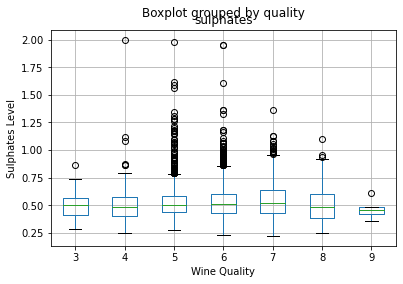

In [31]:
allwine[['quality','sulphates']].boxplot(by='quality')
plt.xlabel('Wine Quality')
plt.ylabel('Sulphates Level')
plt.show()

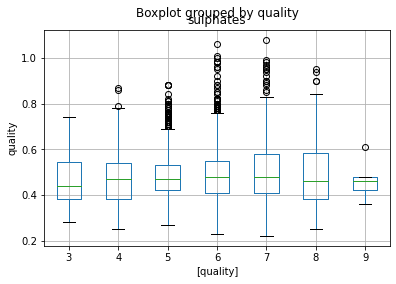

In [32]:
wwine[['quality','sulphates']].boxplot(by='quality')
plt.ylabel('quality')
plt.show()

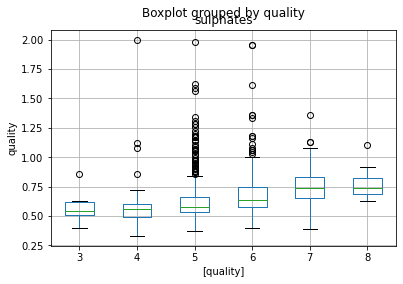

In [33]:
rwine[['quality','sulphates']].boxplot(by='quality')
plt.ylabel('quality')
plt.show()

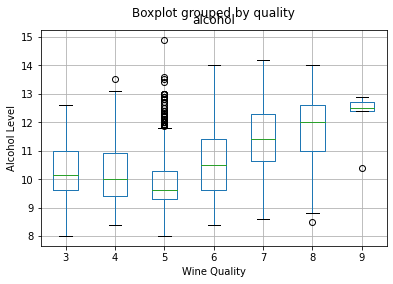

In [34]:
allwine[['quality','alcohol']].boxplot(by='quality')
plt.ylabel('Alcohol Level')
plt.xlabel('Wine Quality')
plt.show()

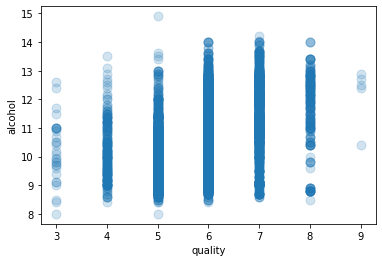

In [35]:
allwine.plot.scatter('quality','alcohol',alpha=0.2,s=80)
plt.show()

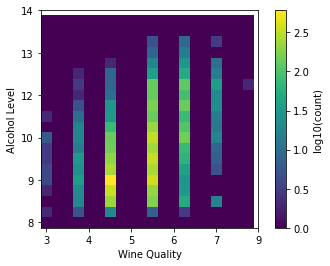

In [45]:
nbins = 20

heatmap, xedges, yedges = np.histogram2d(allwine['quality'], allwine['alcohol'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined

plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0) # use log count
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol Level')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

In [37]:
wy = wwine['quality']
wX = wwine.loc[:, wwine.columns != 'quality'] 
ry = rwine['quality']
rX = rwine.loc[:, rwine.columns != 'quality'] 
yall = allwine['quality']
Xall = allwine.loc[:, allwine.columns != 'quality'] 

In [38]:
random_state = 44
wX_other, wX_test, wy_other, wy_test = train_test_split(wX,wy,test_size = 0.2,stratify=wy,random_state=random_state)
print('test balance:',wy_test.value_counts(normalize=True))

kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)

for train_index, val_index in kf.split(wX_other,wy_other):
    wX_train = wX_other.iloc[train_index]
    wy_train = wy_other.iloc[train_index]
    wX_val = wX_other.iloc[val_index]
    wy_val = wy_other.iloc[val_index]
    print('train balance:')
    print(wy_train.value_counts(normalize=True))
    print('val balance:')
    print(wy_val.value_counts(normalize=True))

test balance: 6    0.448980
5    0.296939
7    0.179592
8    0.035714
4    0.033673
3    0.004082
9    0.001020
Name: quality, dtype: float64
train balance:
6    0.448604
5    0.297822
7    0.179714
8    0.035739
4    0.033016
3    0.004084
9    0.001021
Name: quality, dtype: float64
val balance:
6    0.448980
5    0.296939
7    0.179592
8    0.035714
4    0.033673
3    0.004082
9    0.001020
Name: quality, dtype: float64
train balance:
6    0.448604
5    0.297822
7    0.179714
8    0.035739
4    0.033016
3    0.004084
9    0.001021
Name: quality, dtype: float64
val balance:
6    0.448980
5    0.296939
7    0.179592
8    0.035714
4    0.033673
3    0.004082
9    0.001020
Name: quality, dtype: float64
train balance:
6    0.448792
5    0.297380
7    0.179653
8    0.035726
4    0.033345
3    0.004083
9    0.001021
Name: quality, dtype: float64
val balance:
6    0.448417
5    0.298264
7    0.179775
8    0.035751
4    0.032686
3    0.004086
9    0.001021
Name: quality, dtype: float64
train 

In [39]:
rX_other, rX_test, ry_other, ry_test = train_test_split(rX,ry,test_size = 0.2,stratify=ry,random_state=random_state)
print('test balance:',ry_test.value_counts(normalize=True))

for train_index, val_index in kf.split(rX_other,ry_other):
    rX_train = rX_other.iloc[train_index]
    ry_train = ry_other.iloc[train_index]
    rX_val = rX_other.iloc[val_index]
    ry_val = ry_other.iloc[val_index]
    print('train balance:')
    print(ry_train.value_counts(normalize=True))
    print('val balance:')
    print(ry_val.value_counts(normalize=True))

test balance: 5    0.425000
6    0.400000
7    0.125000
4    0.034375
8    0.009375
3    0.006250
Name: quality, dtype: float64
train balance:
5    0.425443
6    0.399374
7    0.124088
4    0.033368
8    0.011470
3    0.006257
Name: quality, dtype: float64
val balance:
5    0.428125
6    0.396875
7    0.125000
4    0.031250
8    0.012500
3    0.006250
Name: quality, dtype: float64
train balance:
5    0.426486
6    0.398332
7    0.124088
4    0.033368
8    0.011470
3    0.006257
Name: quality, dtype: float64
val balance:
5    0.42500
6    0.40000
7    0.12500
4    0.03125
8    0.01250
3    0.00625
Name: quality, dtype: float64
train balance:
5    0.426486
6    0.398332
7    0.125130
4    0.032325
8    0.011470
3    0.006257
Name: quality, dtype: float64
val balance:
5    0.425000
6    0.400000
7    0.121875
4    0.034375
8    0.012500
3    0.006250
Name: quality, dtype: float64
train balance:
5    0.426042
6    0.398958
7    0.123958
4    0.032292
8    0.012500
3    0.006250
Name: quali

In [40]:
Xall_other, Xall_test, yall_other, yall_test = train_test_split(Xall,yall,test_size = 0.2,stratify=yall,random_state=random_state)
print('test balance:',yall_test.value_counts(normalize=True))

for train_index, val_index in kf.split(Xall_other,yall_other):
    Xall_train = Xall_other.iloc[train_index]
    yall_train = yall_other.iloc[train_index]
    Xall_val = Xall_other.iloc[val_index]
    yall_val = yall_other.iloc[val_index]
    print('train balance:')
    print(yall_train.value_counts(normalize=True))
    print('val balance:')
    print(yall_val.value_counts(normalize=True))

test balance: 6    0.436154
5    0.329231
7    0.166154
4    0.033077
8    0.030000
3    0.004615
9    0.000769
Name: quality, dtype: float64
train balance:
6    0.436490
5    0.329228
7    0.166025
4    0.033102
8    0.029766
3    0.004619
9    0.000770
Name: quality, dtype: float64
val balance:
6    0.436923
5    0.328462
7    0.166154
4    0.033846
8    0.029231
3    0.004615
9    0.000769
Name: quality, dtype: float64
train balance:
6    0.436634
5    0.328887
7    0.165983
4    0.033350
8    0.029759
3    0.004618
9    0.000770
Name: quality, dtype: float64
val balance:
6    0.436490
5    0.329484
7    0.166282
4    0.033102
8    0.029253
3    0.004619
9    0.000770
Name: quality, dtype: float64
train balance:
6    0.436634
5    0.328887
7    0.166239
4    0.033350
8    0.029502
3    0.004618
9    0.000770
Name: quality, dtype: float64
val balance:
6    0.436490
5    0.329484
7    0.165512
4    0.033102
8    0.030023
3    0.004619
9    0.000770
Name: quality, dtype: float64
train 

In [41]:
scaler = MinMaxScaler()

wX_train_prep = scaler.fit_transform(wX_train)
wX_test_prep = scaler.transform(wX_test) 
wX_val_prep = scaler.transform(wX_val)
print(wX_train_prep)
print(wX_test_prep)
print(wX_val_prep)

[[0.30097087 0.05882353 0.24096386 ... 0.38834951 0.23255814 0.61290323]
 [0.46601942 0.14705882 0.19277108 ... 0.32038835 0.29069767 0.12903226]
 [0.30097087 0.06862745 0.1686747  ... 0.16504854 0.19767442 0.16129032]
 ...
 [0.3592233  0.19607843 0.10240964 ... 0.2815534  0.24418605 0.32258065]
 [0.23300971 0.18627451 0.29518072 ... 0.57281553 0.23255814 0.67741935]
 [0.27184466 0.04901961 0.19277108 ... 0.32038835 0.25581395 0.32258065]]
[[0.21359223 0.25490196 0.27710843 ... 0.48543689 0.46511628 0.69354839]
 [0.39805825 0.16666667 0.29518072 ... 0.2815534  0.13953488 0.22580645]
 [0.27184466 0.16666667 0.18674699 ... 0.3592233  0.36046512 0.24193548]
 ...
 [0.34951456 0.16666667 0.19277108 ... 0.32038835 0.27906977 0.4516129 ]
 [0.33009709 0.31372549 0.15662651 ... 0.04854369 0.37209302 0.83870968]
 [0.39805825 0.16666667 0.1626506  ... 0.19417476 0.1627907  0.51612903]]
[[0.29126214 0.18627451 0.29518072 ... 0.18446602 0.29069767 0.09677419]
 [0.33980583 0.11764706 0.22289157 ... 

In [42]:
rX_train_prep = scaler.fit_transform(rX_train)
rX_test_prep = scaler.transform(rX_test) 
rX_val_prep = scaler.transform(rX_val)
print(rX_train_prep)
print(rX_test_prep)
print(rX_val_prep)

[[0.19642857 0.34931507 0.43421053 ... 0.31304348 0.10691824 0.16923077]
 [0.23214286 0.39383562 0.         ... 0.54782609 0.08176101 0.12307692]
 [0.23214286 0.18493151 0.40789474 ... 0.47826087 0.09433962 0.15384615]
 ...
 [0.34821429 0.06849315 0.47368421 ... 0.53043478 0.30188679 0.4       ]
 [0.39285714 0.2260274  0.46052632 ... 0.45217391 0.14465409 0.16923077]
 [0.32142857 0.14383562 0.55263158 ... 0.45217391 0.23899371 0.66153846]]
[[0.24107143 0.25342466 0.35526316 ... 0.42608696 0.1509434  0.55384615]
 [0.39285714 0.16438356 0.51315789 ... 0.27826087 0.27044025 0.4       ]
 [0.35714286 0.39041096 0.40789474 ... 0.53913043 0.22012579 0.49230769]
 ...
 [0.33035714 0.18493151 0.13157895 ... 0.2        0.02515723 0.2       ]
 [0.29464286 0.20547945 0.22368421 ... 0.37391304 0.13836478 0.12307692]
 [0.13392857 0.45547945 0.         ... 0.63478261 0.13836478 0.24615385]]
[[ 0.38392857  0.45547945  0.31578947 ...  0.37391304  0.17610063
   0.24615385]
 [ 0.52678571  0.15068493  0.64

In [43]:
Xall_train_prep = scaler.fit_transform(Xall_train)
Xall_test_prep = scaler.transform(Xall_test) 
Xall_val_prep = scaler.transform(Xall_val)
print(Xall_train_prep)
print(Xall_test_prep)
print(Xall_val_prep)

[[0.19008264 0.064      0.14457831 ... 0.72868217 0.19662921 0.33333333]
 [0.31404959 0.32       0.18674699 ... 0.27131783 0.21910112 0.20289855]
 [0.31404959 0.176      0.15060241 ... 0.31007752 0.15168539 0.17391304]
 ...
 [0.65289256 0.16       0.28313253 ... 0.33333333 0.25280899 0.37681159]
 [0.3553719  0.136      0.22891566 ... 0.37984496 0.08988764 0.50724638]
 [0.16528926 0.136      0.1686747  ... 0.54263566 0.11797753 0.2173913 ]]
[[0.16528926 0.088      0.19879518 ... 0.34108527 0.11235955 0.47826087]
 [0.30578512 0.484      0.04216867 ... 0.51162791 0.18539326 0.42028986]
 [0.24793388 0.224      0.14457831 ... 0.42635659 0.06741573 0.66666667]
 ...
 [0.28099174 0.08       0.18674699 ... 0.46511628 0.1011236  0.4057971 ]
 [0.31404959 0.272      0.04819277 ... 0.37984496 0.20786517 0.28985507]
 [0.31404959 0.264      0.08433735 ... 0.46511628 0.19662921 0.36231884]]
[[0.21487603 0.04       0.1686747  ... 0.58139535 0.16853933 0.46376812]
 [0.34710744 0.392      0.23493976 ... 

In [44]:
Xall_train_prep.shape

(3898, 11)